In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from core_functions import SensorSignals

# Model with usual halving of image size and doubling the depth
class CNN_STANDARD(nn.Module):    
    def __init__(self):
        super(CNN_STANDARD, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 384),
            nn.ReLU(),
            nn.Linear(384, 128),
            nn.ReLU(),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_2(nn.Module):    
    def __init__(self):
        super(CNN_2, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 384),
            nn.ReLU(),
            nn.Linear(384, 128),
            nn.ReLU(),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [2]:
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath) 
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

models, models_losses, models_acc, models_label = [], [], [], []
for i, model in enumerate([CNN_2(), CNN_STANDARD()]):

    # Train
    S.train_model(model, learning_rate=5e-3, batch_size=128, max_epochs=100, weight_decay=1e-4)

    models.append(model)
    models_losses.append(S.losses)
    models_acc.append(S.accuracies)
    models_label.append(f"model {i}")


Train, Test and Validation set were normalized!
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7891, 32)
Labels shape:  (7891,)
Unique labels:  [0 1 2]
Shape of test set: (1184, 32)
Shape of train set: (5700, 32)
Shape of validation set: (1007, 32)
Fraction of single class in test set:  0.2981418918918919
Epoch 1, Batch 1: loss=4.015, train=38.6%, val=40.5%
Epoch 2, Batch 1: loss=0.907, train=53.8%, val=55.8%
Epoch 3, Batch 1: loss=0.810, train=52.9%, val=54.0%
Epoch 4, Batch 1: loss=0.807, train=66.8%, val=67.3%
Epoch 5, Batch 1: loss=0.616, train=70.3%, val=70.3%
Epoch 6, Batch 1: loss=0.598, train=69.0%, val=70.1%
Epoch 7, Batch 1: loss=0.722, train=74.6%, val=76.2%
Epoch 8, Batch 1: loss=0.623, train=75.8%, val=77.8%
Epoch 9, Batch 1: loss=0.456, train=78.1%, val=79.5%
Epoch 10, Batch 1: loss=0.523, train=76.9%, val=78.1%
Epoch 11, Batch 1: loss=0.679, train=79.2%, val=80.1%
Epoch 12, Batch 1: loss=0.579, train=78.6%, val=80.0%
Epoch 13, Batch 1: loss=0.493, train=79

Epoch 47, Batch 1: loss=0.464, train=85.1%, val=86.2%
Epoch 48, Batch 1: loss=0.262, train=85.3%, val=86.6%
Epoch 49, Batch 1: loss=0.385, train=84.0%, val=83.5%
Epoch 50, Batch 1: loss=0.446, train=85.1%, val=84.1%
Epoch 51, Batch 1: loss=0.491, train=85.9%, val=86.3%
Epoch 52, Batch 1: loss=0.379, train=83.6%, val=84.6%
Epoch 53, Batch 1: loss=0.244, train=86.0%, val=85.6%
Epoch 54, Batch 1: loss=0.317, train=85.9%, val=85.2%
Epoch 55, Batch 1: loss=0.332, train=87.1%, val=87.6%
Epoch 56, Batch 1: loss=0.420, train=85.7%, val=85.6%
Epoch 57, Batch 1: loss=0.333, train=84.4%, val=83.7%
Epoch 58, Batch 1: loss=0.333, train=84.9%, val=85.3%
Epoch 59, Batch 1: loss=0.250, train=83.7%, val=85.4%
Epoch 60, Batch 1: loss=0.409, train=86.0%, val=86.7%
Epoch 61, Batch 1: loss=0.291, train=87.3%, val=86.9%
Epoch 62, Batch 1: loss=0.238, train=87.0%, val=86.7%
Epoch 63, Batch 1: loss=0.244, train=86.6%, val=86.9%
Epoch 64, Batch 1: loss=0.456, train=86.8%, val=87.1%
Epoch 65, Batch 1: loss=0.33

Accuracy of test set of best model (idx=1): 88.5%


0.8851351351351351

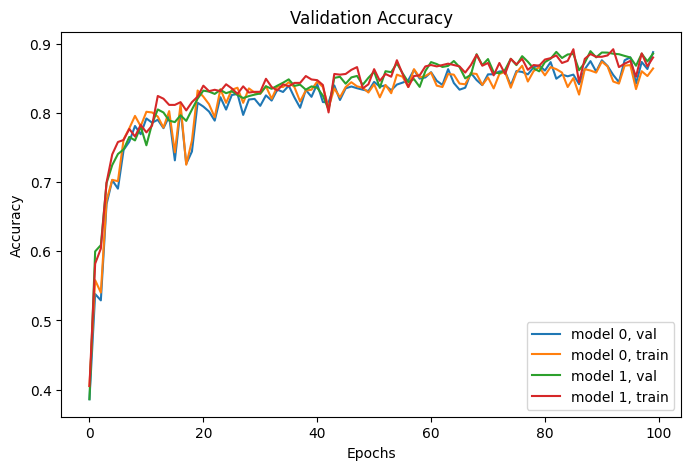

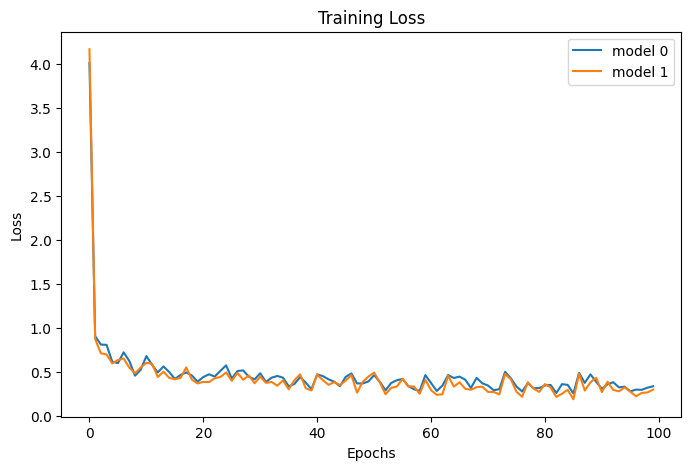

In [4]:
# Plot results from training
def plotAcc(models_label, models_acc):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    for lab, accs in zip(models_label, models_acc):
        plt.plot(np.arange(accs.shape[0]), accs, label=[lab+", val", lab+", train"])
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")


def plotLosses(models_label, models_losses):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    plt.title("Training Loss")
    models_losses = np.array(models_losses)
    plt.plot(np.arange(models_losses.shape[1]), models_losses.T, label=models_label)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    
    
def bestModelAcc(models, models_acc, S):
    """
    Prints test accuracy of best model
    Chooses model that yields the best validation accuracy
    S is object containing the data used during training 
    """
    best_acc_idx = np.argmax([acc[-1, -1] for acc in models_acc])
    best_model = models[best_acc_idx]
    best_acc = S.acc_te(best_model)
    print(f"Accuracy of test set of best model (idx={best_acc_idx}): {best_acc*100:.1f}%")
    return best_acc 

# Plot
plotAcc(models_label, models_acc)
plotLosses(models_label, models_losses)
# Print accuracy
bestModelAcc(models, models_acc, S)

In [5]:
# Convolutional architecture with 3 layers
# Investigate how number of channels and kernel size changes the results

# class CNN2(nn.Module):    
#     def __init__(self, channels, kernels, h_neurons, p_drop):
#         super(CNN2, self).__init__()
#      
#         ch1, ch2, ch3 = channels
#         k1, k2, k3 = kernels
#         pad1, pad2, pad3 = int((k1-1)/2), int((k2-1)/2), int((k3-1)/2)
#         h1, h2 = h_neurons
#         p1, p2, p3 = p_drop
#
#         self.conv = nn.Sequential(    # Convolutional part, 3 layers
#             nn.Conv1d(1, ch1, kernel_size=k1, padding=pad1),
#             nn.Dropout(p1),
#             nn.ReLU(),
#             nn.Conv1d(ch1, ch2, kernel_size=k2, padding=pad2),
#             nn.Dropout(p2),
#             nn.ReLU(),
#             nn.Conv1d(ch2, ch3, kernel_size=k3, padding=pad3),
#             nn.Dropout(p3),
#             nn.ReLU(),
#             nn.MaxPool1d(4)   # Single pool layer with kernel=4 gave better results than 2 pool layers with kernel=2
#         )
#         self.fc = nn.Sequential(        # Fully connected part, 3 layers
#             nn.Linear(ch3 * 7, h1),
#             nn.ReLU(),
#             nn.Linear(h1, h2),
#             nn.ReLU(),
#             nn.Linear(h2, 3)
#         )
#
#     def forward(self, x):
#         x = self.conv(x)
#         x = x.view(x.shape[0], -1)
#         x = self.fc(x)
#         return x
#
# # Fix kernels
# kernels = [5, 5, 5]
# # Test 3 different channels
# channels = [16, 16, 16]      # Keep sizes of channels the same because there is not reduction in the image
# # Test different sizes of hidden layers 
# h_neurons = [300, 200]
# # Test different rates of Dropout
# p_drop = [[0, 0, 0]]
#
# #Run training  
# # Initialize results
# G = SensorSignals("./second_collection_triggs_rels.npz") 
# G.split_data()
# G.norm_X()
# G.setup_tensors()
# G.print_shapes()
#
# models, models_losses, models_acc, models_label = [], [], [], []
# for i, pp in enumerate(p_drop):
#
#     model = CNN2(channels, kernels, h_neurons, pp)
#
#     # Train
#     G.train_model(model, learning_rate=5e-3, batch_size=128, max_epochs=20, weight_decay=1e-4)
#
#     models.append(model)
#     models_losses.append(G.losses)
#     models_acc.append(G.accuracies)
#     models_label.append(f"model {i}")
#
# plotAcc(models_label, models_acc)
# plotLosses(models_label, models_losses)
# acc_best_FC = bestModelAcc(models, models_acc, G)
#